Dheeraj N G - DATA SCIENCE AND BUSINESS ANALYTICS

TASK 2

FORMULATE QUESTION :- From the IRIS dataset, predict the optimum number of clustures

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

DATA GATHERING

In [2]:
iris_dataset = load_iris()
print('Dataset imported successfully! \n')
print('Type of dataset:',type(iris_dataset))

Dataset imported successfully! 

Type of dataset: <class 'sklearn.utils.Bunch'>


EXPLORING THE DATA

In [3]:
# Python function which is used to look python object's attributes
dir(iris_dataset)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
# Displaying the feature names 
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Creating a DataFrame 
df = pd.DataFrame(iris_dataset.data,columns = iris_dataset.feature_names)
# Dropping 2 columns
df.drop(['petal length (cm)','petal width (cm)'], axis = 1, inplace = True)
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


VISUALIZING DATA

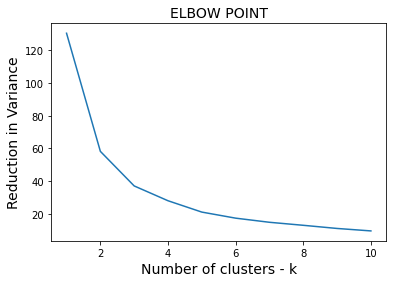

In [6]:
# Finding the optimum number of clusters for k-means classification
x = df.iloc[:, [0, 1]].values

#Creating an empty list for Total Variance
t_v = [] 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    t_v.append(kmeans.inertia_)
    
#Plotting THE ELBOW POINT GRAPH to get the k-value
plt.plot( range(1,11) , t_v)
plt.title('ELBOW POINT',fontsize = 14)
plt.xlabel('Number of clusters - k', fontsize = 14)
plt.ylabel('Reduction in Variance', fontsize = 14) 
plt.show()

In [7]:
# From the ELBOW POINT we got our k value, i.e k = 3
kmeans = KMeans(n_clusters = 3)
number_of_clusters = kmeans.fit_predict(x)

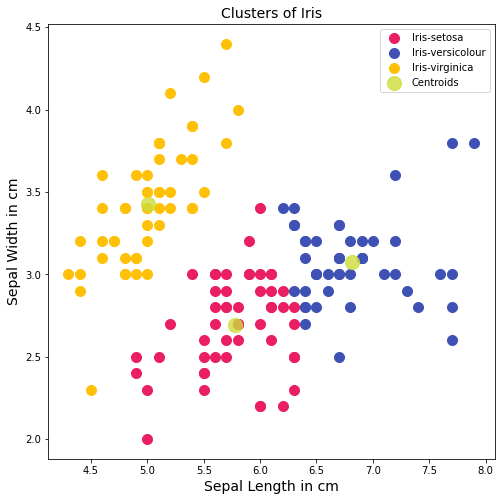

In [8]:
# PLotting for Clusters
plt.figure(figsize=[8,8])
plt.title('Clusters of Iris', fontsize = 14)
plt.xlabel('Sepal Length in cm', fontsize = 14)
plt.ylabel('Sepal Width in cm', fontsize = 14)

plt.scatter(x[number_of_clusters == 0, 0], x[number_of_clusters == 0, 1],s = 100, c = '#E91E63', label = 'Iris-setosa')
plt.scatter(x[number_of_clusters == 1, 0], x[number_of_clusters == 1, 1],s = 100, c = '#3F51B5', label = 'Iris-versicolour')
plt.scatter(x[number_of_clusters == 2, 0], x[number_of_clusters == 2, 1],s = 100, c = '#FFC107', label = 'Iris-virginica')

# Plotting for Centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 200, c = '#CDDC39', label = 'Centroids', alpha = 0.8)

plt.legend()